In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
builds = gpd.read_file('./Tennessee.geojson')

In [3]:
tn_cbg = gpd.read_file('../Tennessee Census Block Groups/tl_2020_47_bg.shp')
ham_cbg = tn_cbg[tn_cbg['COUNTYFP']=='065'].reset_index(drop=True)
ham_cbg.GEOID = ham_cbg.GEOID.astype(str)
ham_cbg = ham_cbg.to_crs('epsg:4326')

In [4]:
ham_builds = builds.sjoin(ham_cbg)

In [5]:
ham_builds['geo_centers'] = ham_builds.geometry.centroid

c:\Users\senr1\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


<AxesSubplot:>

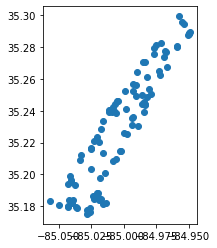

In [6]:
# len(ham_builds.GEOID.unique())
ham_builds[:100]['geo_centers'].plot()

<AxesSubplot:>

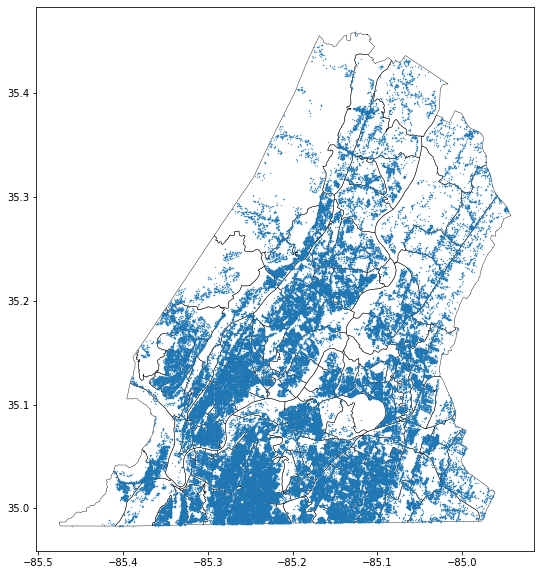

In [65]:
ax=ham_cbg.plot(figsize=(10, 10), color='None', edgecolor="black", linewidth=0.4)
ham_builds.geo_centers.plot(figsize=(10, 10), ax=ax, markersize=0.1)

In [14]:
ham_builds['location'] = ham_builds.geo_centers.apply(lambda p: [p.y, p.x])

In [31]:
ham_builds.head()

,release,capture_dates_range,geometry,index_right,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geo_centers,location
39099,2,8/29/2019-8/30/2019,"POLYGON ((-84.94933 35.28930, -84.94924 35.289...",128,47,065,010103,1,470650101031,Block Group 1,G5030,S,46566119,0,+35.2287381,-084.9991964,POINT (-84.94930 35.28934),"[35.289344, -84.949295]"
39317,2,8/29/2019-8/30/2019,"POLYGON ((-84.97287 35.26468, -84.97285 35.264...",128,47,065,010103,1,470650101031,Block Group 1,G5030,S,46566119,0,+35.2287381,-084.9991964,POINT (-84.97279 35.26466),"[35.26466113546489, -84.97279290174595]"
39363,2,8/29/2019-8/30/2019,"POLYGON ((-84.98417 35.24532, -84.98441 35.245...",128,47,065,010103,1,470650101031,Block Group 1,G5030,S,46566119,0,+35.2287381,-084.9991964,POINT (-84.98444 35.24538),"[35.24538037553615, -84.9844380965369]"
39365,2,8/29/2019-8/30/2019,"POLYGON ((-84.98439 35.23953, -84.98452 35.239...",128,47,065,010103,1,470650101031,Block Group 1,G5030,S,46566119,0,+35.2287381,-084.9991964,POINT (-84.98452 35.23941),"[35.239405729198054, -84.98451714183622]"
39413,2,8/29/2019-8/30/2019,"POLYGON ((-84.98953 35.26423, -84.98951 35.264...",128,47,065,010103,1,470650101031,Block Group 1,G5030,S,46566119,0,+35.2287381,-084.9991964,POINT (-84.98957 35.26426),"[35.26425817954196, -84.98957093443282]"
